In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
DATASET_PATH = "data/Spotify_Youtube.csv"
df = pd.read_csv(DATASET_PATH)

if 'unnamed: 0' in df.columns:
    df = df.drop(columns=['unnamed: 0'])

df.head()

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\r\nhttp://gorillaz.com...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  
4      True           True  6.172597e+08  

[5 rows x 28 columns]

In [47]:
df.shape
df.info()
df.describe()
df.isnull().sum()
df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

['Unnamed: 0',
 'Artist',
 'Url_spotify',
 'Track',
 'Album',
 'Album_type',
 'Uri',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Url_youtube',
 'Title',
 'Channel',
 'Views',
 'Likes',
 'Comments',
 'Description',
 'Licensed',
 'official_video',
 'Stream']

In [48]:
df = df.drop_duplicates()

if 'genre' in df.columns:
    df['genre'] = df['genre'].fillna('Unknown')

if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

if 'duration_ms' in df.columns:
    df['duration_sec'] = df['duration_ms'] / 1000
elif 'duration' in df.columns:
    df['duration_sec'] = df['duration']
else:
    df['duration_sec'] = np.nan

C:\Users\gitan\AppData\Local\Temp\ipykernel_13060\751045180.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




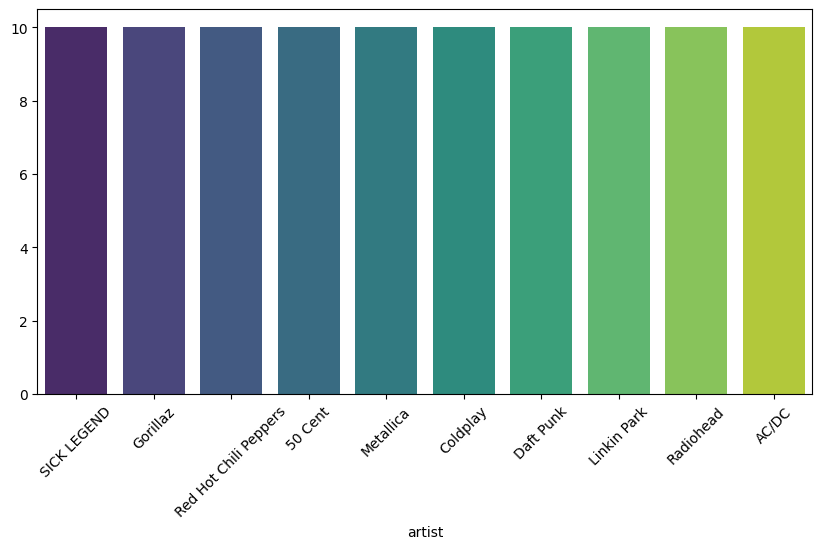

No 'genre' column found in dataset.


In [49]:
df.columns = df.columns.str.strip().str.lower()

if 'artist' in df.columns:
    top_artists = df['artist'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'artist' column found in dataset.")

if 'genre' in df.columns:
    top_genres = df['genre'].value_counts().head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette="magma")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'genre' column found in dataset.")

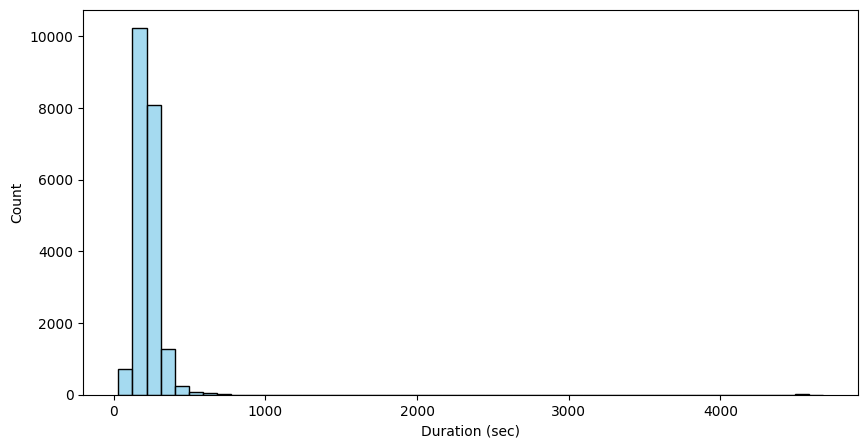

In [50]:
df['duration_sec'] = df['duration_ms'] / 1000

plt.figure(figsize=(10,5))
sns.histplot(df['duration_sec'].dropna(), bins=50, color='skyblue')
plt.xlabel("Duration (sec)")
plt.show()

if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year
    duration_year = df[df['year'].notna()]
    if not duration_year.empty:
        plt.figure(figsize=(12,6))
        sns.boxplot(x='year', y='duration_sec', data=duration_year)
        plt.xticks(rotation=90)
        plt.show()

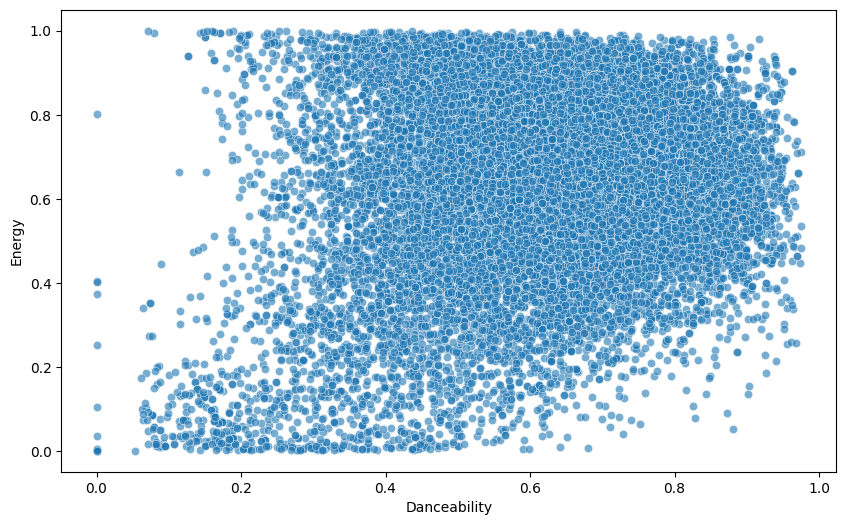

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='danceability', y='energy', data=df, alpha=0.6)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()


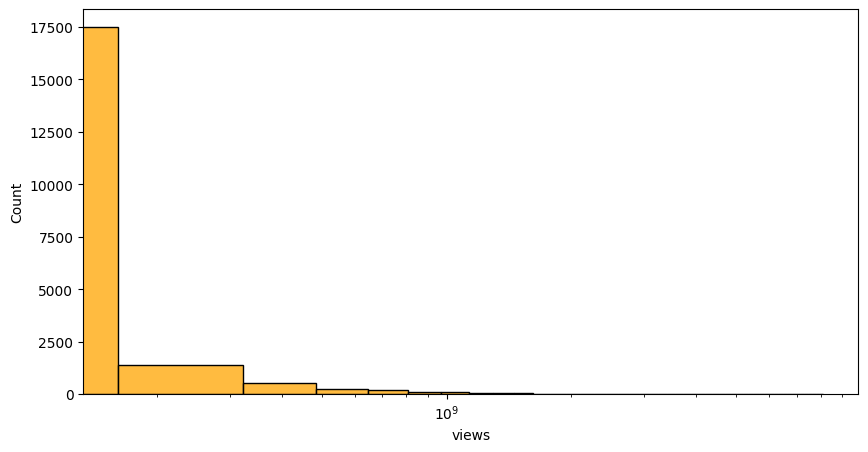

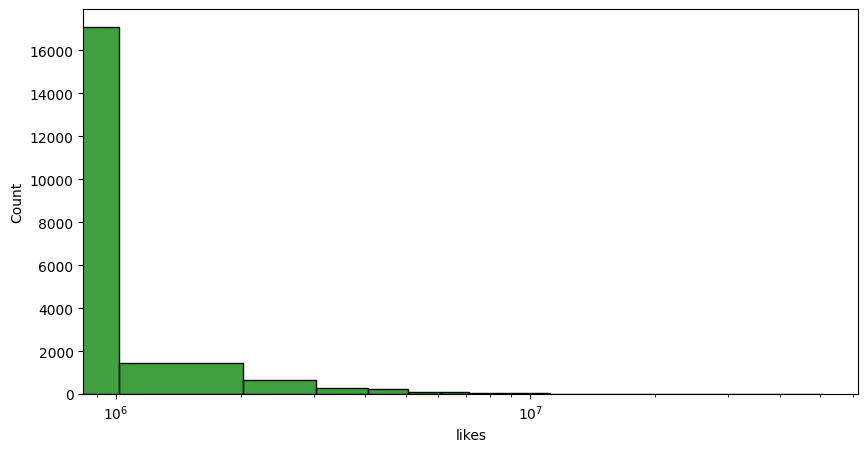

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df['views'].dropna(), bins=50, color='orange')
plt.xscale('log')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['likes'].dropna(), bins=50, color='green')
plt.xscale('log')
plt.show()

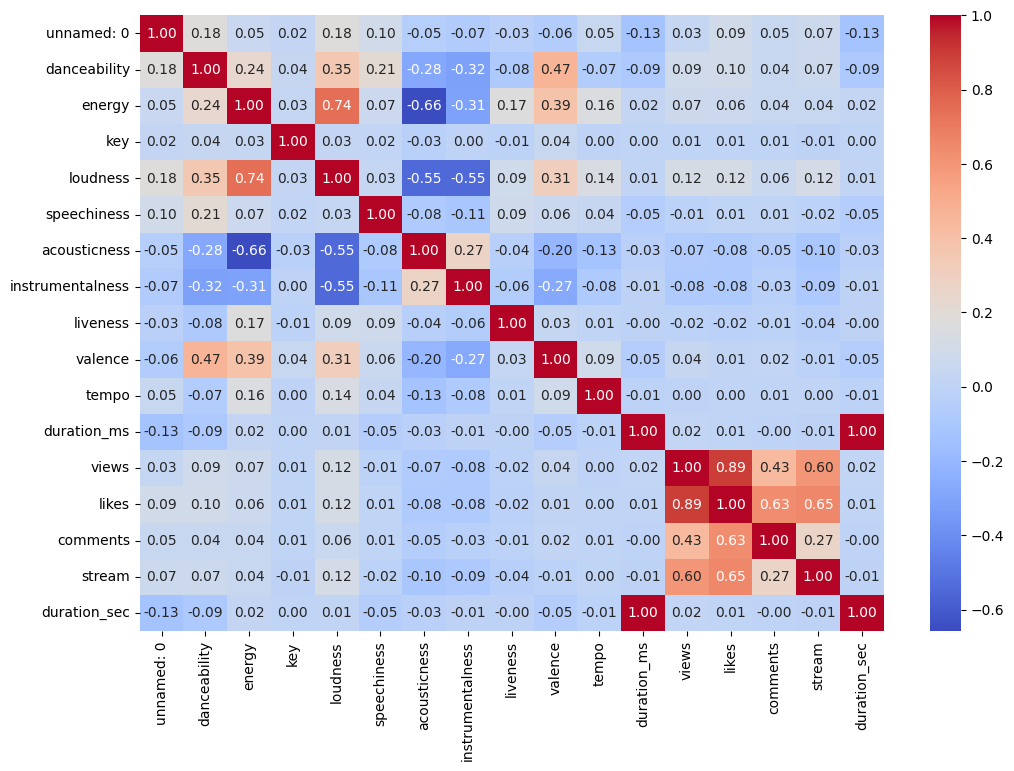

In [53]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [54]:
top_artists_views = df.groupby('artist')['views'].sum().sort_values(ascending=False).head(15).reset_index()
fig = px.bar(top_artists_views, x='artist', y='views', title="Top 15 Artists by Total Views")
fig.show()


In [55]:
top_channels_likes = df.groupby('channel')['likes'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.pie(top_channels_likes, values='likes', names='channel', title="Top 10 Channels by Likes")
fig.show()


In [56]:
df['comments'] = df['comments'].fillna(0)

fig = px.scatter(
    df, 
    x='views', 
    y='likes', 
    size='comments', 
    hover_data=['artist','track'],
    title="Views vs Likes (bubble = comments)"
)
fig.show()



In [57]:
fig = px.scatter(df, x='stream', y='views', hover_data=['artist','track'],
                 title="Spotify Streams vs YouTube Views")
fig.show()
